### Мозговой Никита 
   > лабораторная работа 2


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('train.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Удалим пропуски и повторы

In [19]:
data = data.dropna()
data = data.drop_duplicates()

что изменилось:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9529 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9529 non-null   object 
 1   Age                         9529 non-null   float64
 2   AnnualIncome                9529 non-null   float64
 3   CreditScore                 9529 non-null   float64
 4   LoanAmount                  9529 non-null   float64
 5   LoanDuration                9529 non-null   float64
 6   MaritalStatus               9529 non-null   object 
 7   NumberOfDependents          9529 non-null   float64
 8   HomeOwnershipStatus         9529 non-null   object 
 9   MonthlyDebtPayments         9529 non-null   float64
 10  CreditCardUtilizationRate   9529 non-null   float64
 11  NumberOfOpenCreditLines     9529 non-null   float64
 12  NumberOfCreditInquiries     9529 non-null   float64
 13  DebtToIncomeRatio           9529 non-n

откинем выбросы RiskScore и посмотрим распределение

In [27]:
data = data[(data['RiskScore'] >= 0) & (data['RiskScore'] <= 100)]

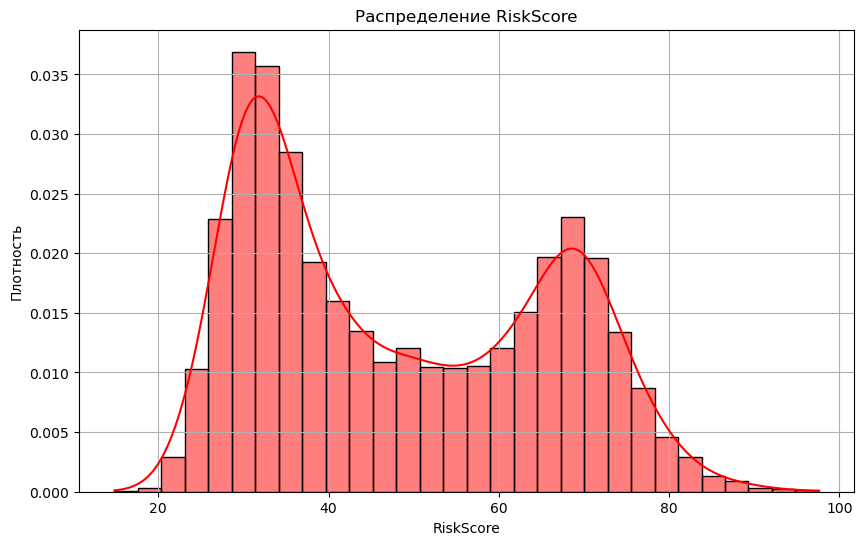

In [41]:
plt.figure(figsize=(10, 6))
    
sns.histplot(data['RiskScore'], bins=30, kde=True, color='red', stat='density')
    
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Плотность')
    
plt.grid()
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   object 
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   object 
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   object 
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-n

преобразуем категориальные признаки

In [35]:
data = data.drop(columns=['ApplicationDate'])

In [47]:
label_encoder = LabelEncoder()

data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['HomeOwnershipStatus'] = label_encoder.fit_transform(data['HomeOwnershipStatus'])
data['LoanPurpose'] = label_encoder.fit_transform(data['LoanPurpose'])
data['EmploymentStatus'] = label_encoder.fit_transform(data['EmploymentStatus'])
data['EducationLevel'] = label_encoder.fit_transform(data['EducationLevel'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         9332 non-null   float64
 1   AnnualIncome                9332 non-null   float64
 2   CreditScore                 9332 non-null   float64
 3   LoanAmount                  9332 non-null   float64
 4   LoanDuration                9332 non-null   float64
 5   MaritalStatus               9332 non-null   int64  
 6   NumberOfDependents          9332 non-null   float64
 7   HomeOwnershipStatus         9332 non-null   int64  
 8   MonthlyDebtPayments         9332 non-null   float64
 9   CreditCardUtilizationRate   9332 non-null   float64
 10  NumberOfOpenCreditLines     9332 non-null   float64
 11  NumberOfCreditInquiries     9332 non-null   float64
 12  DebtToIncomeRatio           9332 non-null   float64
 13  BankruptcyHistory           9332 non-n

корреляция признаков:

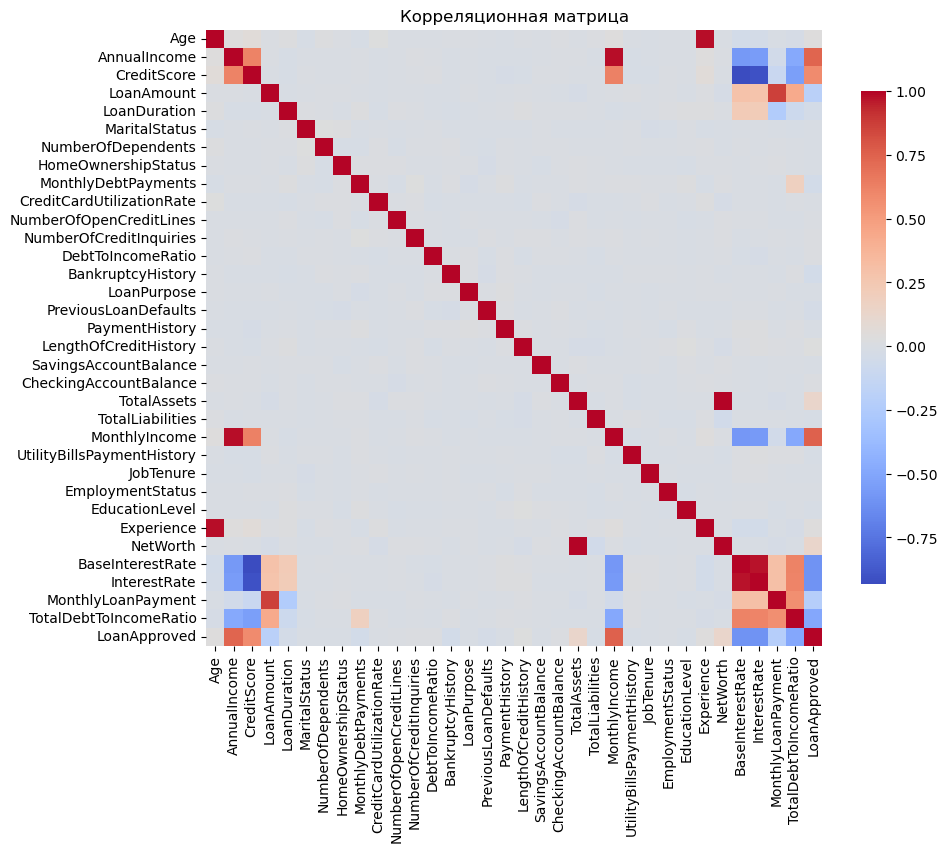

In [54]:
correlation_matrix = data.drop(['RiskScore'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Корреляционная матрица')
plt.show()

наиболее коррелирующие признаки удаляем

In [57]:
data.drop(['Experience', 'MonthlyIncome', 'MonthlyLoanPayment', 'NetWorth', 'BaseInterestRate'], axis=1, inplace=True)


создадим свой класс логистической регрессии 

In [60]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

перейдем непосредственно к обучению 

In [67]:
#разделим данные
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['LoanApproved'], axis=1),
    data['LoanApproved'],
    test_size=0.2,
    random_state=42
)

Accuracy: 0.914301
Precision: 0.924755
Recall: 0.903088
F1 Score: 0.913793


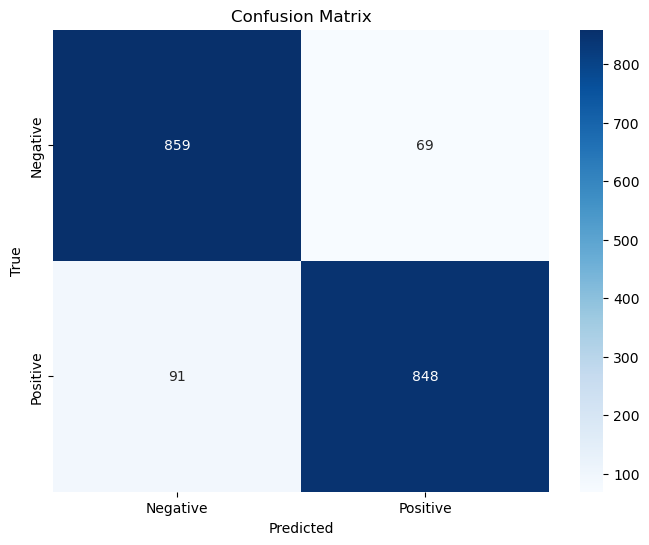

In [77]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.986610
Precision: 0.985138
Recall: 0.988285
F1 Score: 0.986709


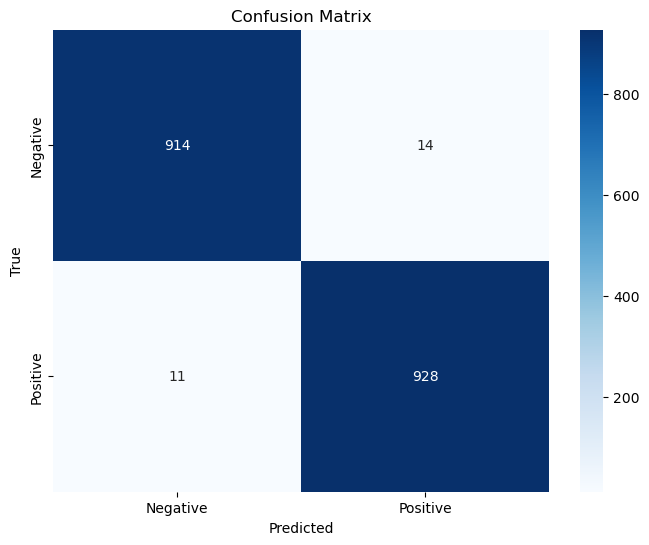

In [83]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.984467
Precision: 0.977941
Recall: 0.991480
F1 Score: 0.984664


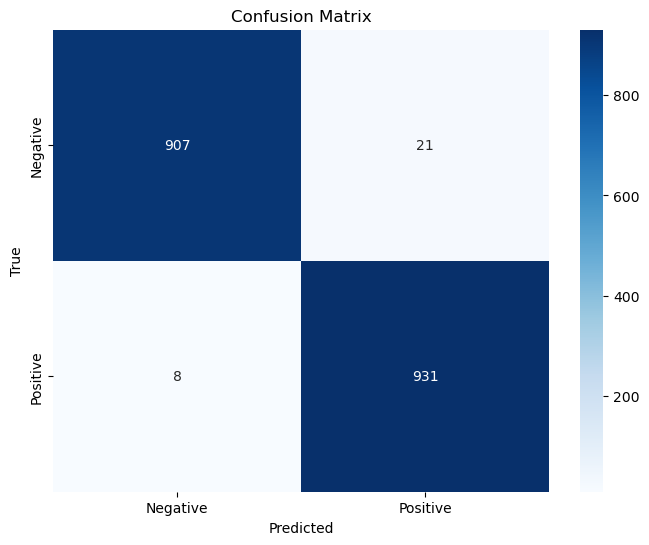

In [85]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.991430
Precision: 0.985279
Recall: 0.997870
F1 Score: 0.991534


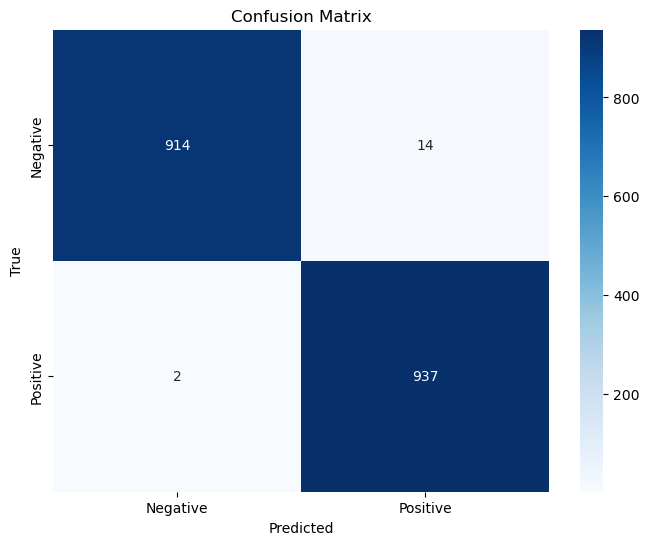

In [87]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[LightGBM] [Info] Number of positive: 3850, number of negative: 3615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3762
[LightGBM] [Info] Number of data points in the train set: 7465, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515740 -> initscore=0.062981
[LightGBM] [Info] Start training from score 0.062981
Accuracy: 0.995179
Precision: 0.994681
Recall: 0.995740
F1 Score: 0.995210


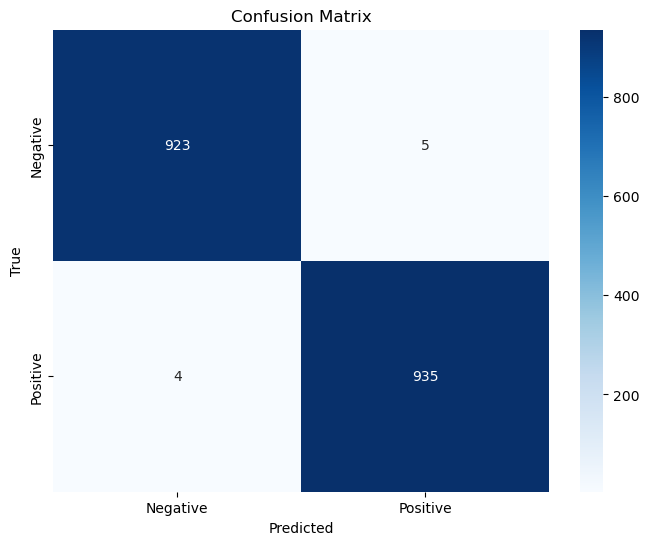

In [89]:
model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.994108
Precision: 0.992569
Recall: 0.995740
F1 Score: 0.994152


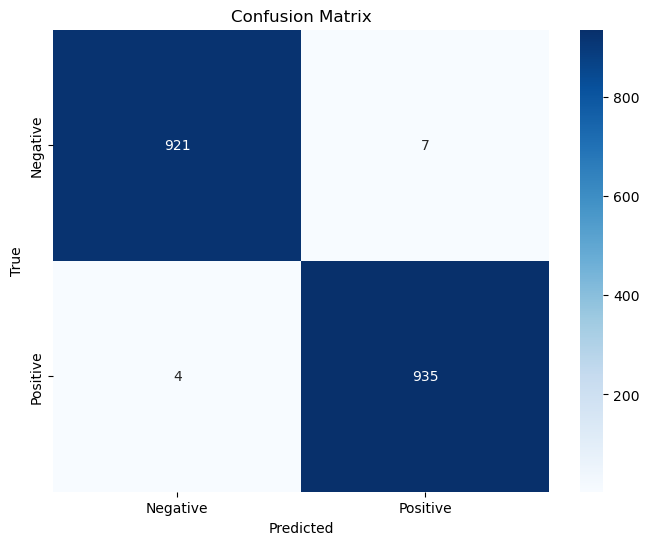

In [91]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Learning rate set to 0.024306
0:	learn: 0.6595340	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6175362	total: 52.7ms	remaining: 26.3s
2:	learn: 0.5809358	total: 54.8ms	remaining: 18.2s
3:	learn: 0.5369934	total: 56.5ms	remaining: 14.1s
4:	learn: 0.5102225	total: 58.4ms	remaining: 11.6s
5:	learn: 0.4746482	total: 60ms	remaining: 9.93s
6:	learn: 0.4546034	total: 61.1ms	remaining: 8.67s
7:	learn: 0.4256103	total: 62.6ms	remaining: 7.76s
8:	learn: 0.3960288	total: 64ms	remaining: 7.04s
9:	learn: 0.3645265	total: 65.4ms	remaining: 6.48s
10:	learn: 0.3361110	total: 66.8ms	remaining: 6.01s
11:	learn: 0.3200549	total: 68.2ms	remaining: 5.62s
12:	learn: 0.3089854	total: 69.6ms	remaining: 5.29s
13:	learn: 0.2894173	total: 71.1ms	remaining: 5.01s
14:	learn: 0.2724779	total: 72.6ms	remaining: 4.77s
15:	learn: 0.2548745	total: 74.1ms	remaining: 4.55s
16:	learn: 0.2455259	total: 75.5ms	remaining: 4.37s
17:	learn: 0.2307701	total: 76.9ms	remaining: 4.2s
18:	learn: 0.2167155	total: 78.3ms	remaining: 4.0

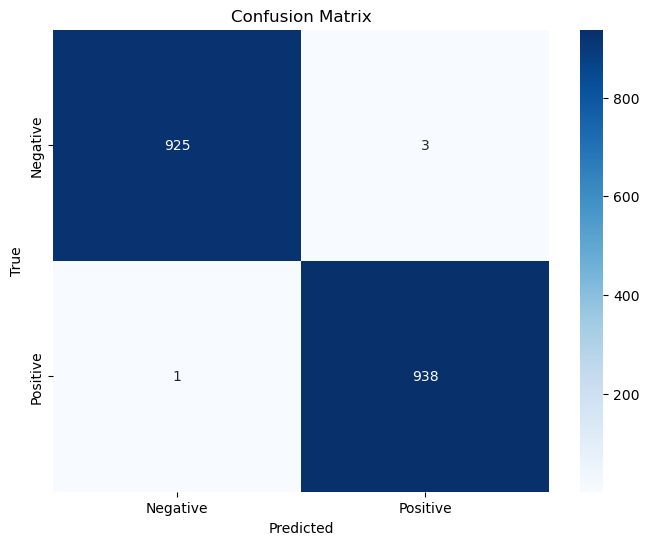

In [93]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1:.6f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

В данной лабораторной работе была решена задача бинарной классификации с использованием различных алгоритмов машинного обучения, реализованных в библиотеке scikit-learn, а также в других популярных библиотеках, таких как LightGBM, XGBoost и CatBoost. 

Сравнение моделей
В результате экспериментов были получены следующие метрики для каждой модели:

> Точность (Accuracy): Процент правильно классифицированных примеров.

> Полнота (Recall): Способность модели находить все положительные примеры.

> Точность (Precision): Процент правильно предсказанных положительных примеров среди всех предсказанных положительных.

> F1-мера: Гармоническое среднее точности и полноты, которое учитывает как ложные положительные, так и ложные отрицательные.


По результатм лучшими стали модели на основе бустинга, то есть LightGBM(Accuracy: 0.995179, Precision: 0.994681, Recall: 0.995740, F1 Score: 0.995210), XGBoost(Accuracy: 0.994108, Precision: 0.992569, Recall: 0.995740, F1 Score: 0.994152) и CatBoost(Accuracy: 0.997858, Precision: 0.996812, Recall: 0.998935, F1 Score: 0.997872).

Лучшим показатель является F1-мера, потому что она как бы балансирует между полнотой и точностью.

В ходе лабораторной работы было продемонстрировано, что выбор алгоритма классификации может существенно повлиять на результаты. Наилучшие результаты были достигнуты с использованием ансамблевых методов, таких как случайный лес и градиентный бустинг, которые продемонстрировали высокую точность и устойчивость к переобучению.

Данная работа подчеркивает важность выбора правильного алгоритма и его настройки для достижения оптимальных результатов в задачах бинарной классификации. Рекомендуется проводить дополнительные эксперименты с настройкой гиперпараметров и использованием методов кросс-валидации для более точной оценки производительности моделей.